In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [13]:
# Only get Data Analyst jobs in United States
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop nans for the plotting

In [17]:
# Check number of NaNs and non-zero values ​​in 'salary_year_avg' column
nan_count = df_da_us['salary_year_avg'].isna().sum()
non_null_count = df_da_us['salary_year_avg'].notna().sum()

# Remove all rows containing NaNs in 'salary_year_avg'
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

549185     77500.0
152710     54540.0
550717     80000.0
684364    119150.0
187787    100000.0
763524     47500.0
589613    115000.0
739042     67500.0
95854      90000.0
260399     65000.0
Name: salary_year_avg, dtype: float64

In [21]:
df_us = df_da_us = df[df['job_country'] == 'United States'].copy()

C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_16304\2074233061.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


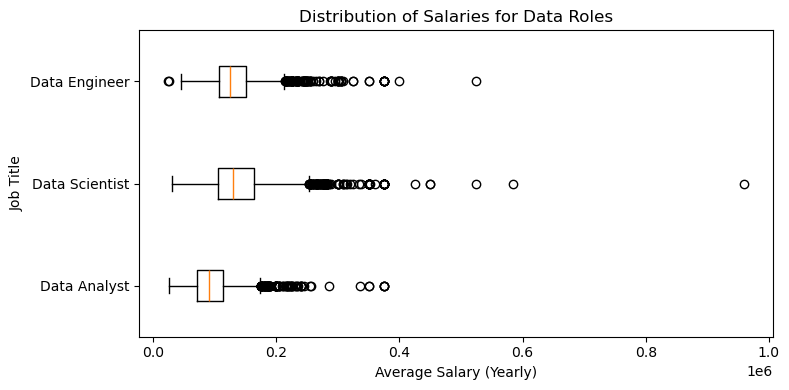

In [28]:
# Filter the DataFrame to include only the desired job titles
filtered_df = df_us[df_us['job_title_short'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst'])]

# Remove NaN values in the 'salary_year_avg' column
filtered_df = filtered_df.dropna(subset=['salary_year_avg'])

# Create a horizontal BoxPlot
plt.figure(figsize=(8, 4))
plt.boxplot(
    [filtered_df[filtered_df['job_title_short'] == job]['salary_year_avg'] for job in ['Data Analyst', 'Data Scientist', 'Data Engineer']],
    labels=['Data Analyst', 'Data Scientist', 'Data Engineer'],
    vert=False  # To display the BoxPlot horizontally
)

# Add titles and labels
plt.title('Distribution of Salaries for Data Roles')
plt.xlabel('Average Salary (Yearly)')
plt.ylabel('Job Title')
plt.tight_layout()

# Display the graph
plt.show()
